Cedente: empresa que pierde al cliente.

Receptor: empresa que gana al cliente.

Modalidad Cedente y Modalidad Receptor: tipo de línea (prepago o postpago).

Mes: fecha del movimiento.

Líneas: cantidad de líneas portadas.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('portabilidad movil.xlsx')
df.info() #tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB


In [13]:
# Eliminar vacios
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB


In [14]:
# Ver las primeras filas
df.head()



,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas
0,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2014-07-01,112
1,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,162
2,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,35
3,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,18
4,Telefónica del Perú S.A.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,601


In [17]:
# Dimensiones del dataset
df.shape



(7095, 6)

In [18]:
# total datos  nulos
df.isnull().sum()

,0
Cedente,0
Receptor,0
Modalidad Cedente,0
Modalidad Receptor,0
Mes,0
Líneas,0


In [20]:
# estadisticas basicas
df['Líneas'].describe()

,Líneas
count,7095.000000
mean,7164.750388
std,12280.606479
min,1.000000
25%,50.000000
50%,1428.000000
75%,8927.500000
max,115446.000000


In [21]:
# Total de líneas por empresa receptora
top_receptores = df.groupby("Receptor")["Líneas"].sum().sort_values(ascending=False).head(5)
print(top_receptores)

Receptor
América Móvil Perú S.A.C.      16486565
Entel Perú S.A.                14341986
Telefónica del Perú S.A.A.     12821445
Viettel Perú S.A.C.             7019091
Flash Servicios Perú S.R.L.      139111
Name: Líneas, dtype: int64


In [30]:
# Evolución mensual
evolucion_mensual = df.groupby("Mes")["Líneas"].sum()
print(evolucion_mensual)

Mes
2014-07-01      5685
2014-08-01      8514
2014-09-01     11844
2014-10-01     40903
2014-11-01     54191
               ...  
2024-10-01    571778
2024-11-01    573893
2024-12-01    577636
2025-01-01    626061
2025-02-01    599692
Name: Líneas, Length: 127, dtype: int64


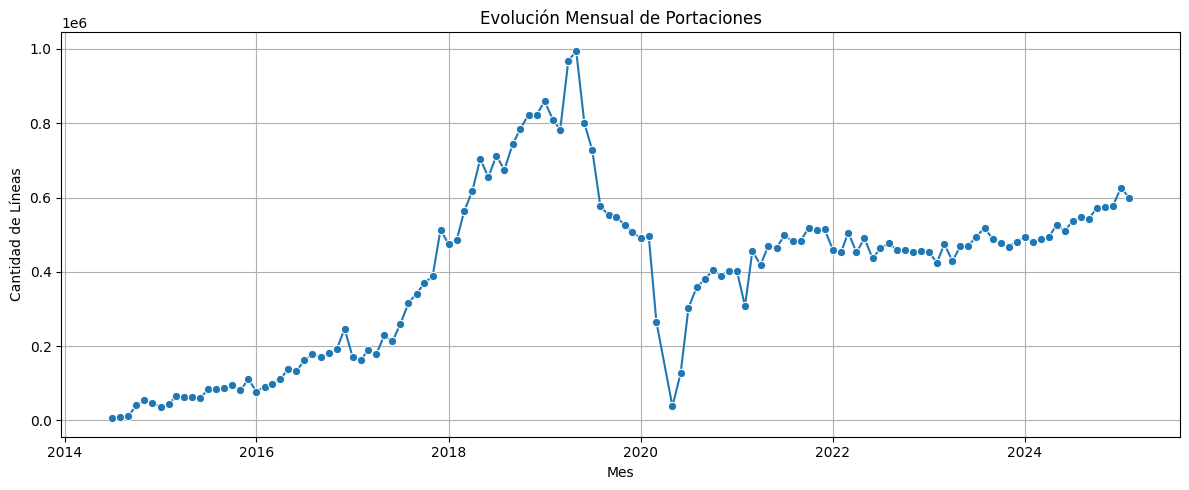

In [31]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=evolucion_mensual.index, y=evolucion_mensual.values, marker="o")
plt.title("Evolución Mensual de Portaciones")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Líneas")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-32-43a3bc37e70f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_receptores.values, y=top_receptores.index, palette="viridis")


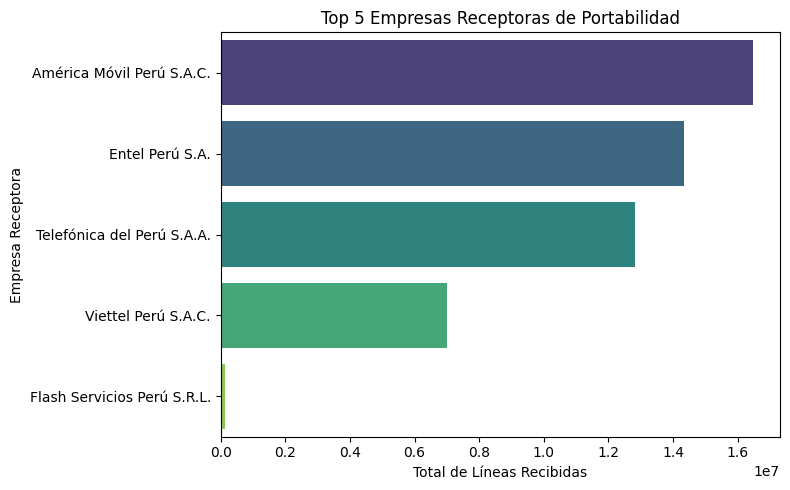

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_receptores.values, y=top_receptores.index, palette="viridis")
plt.title("Top 5 Empresas Receptoras de Portabilidad")
plt.xlabel("Total de Líneas Recibidas")
plt.ylabel("Empresa Receptora")
plt.tight_layout()
plt.show()


Top 5 empresas cedentes (más líneas perdidas):
Cedente
Telefónica del Perú S.A.A.     15592774
América Móvil Perú S.A.C.      13666390
Entel Perú S.A.                12958447
Viettel Perú S.A.C.             8506349
Flash Servicios Perú S.R.L.       94616
Name: Líneas, dtype: int64


<ipython-input-37-e04425644182>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cedentes.values, y=top_cedentes.index, palette="rocket")


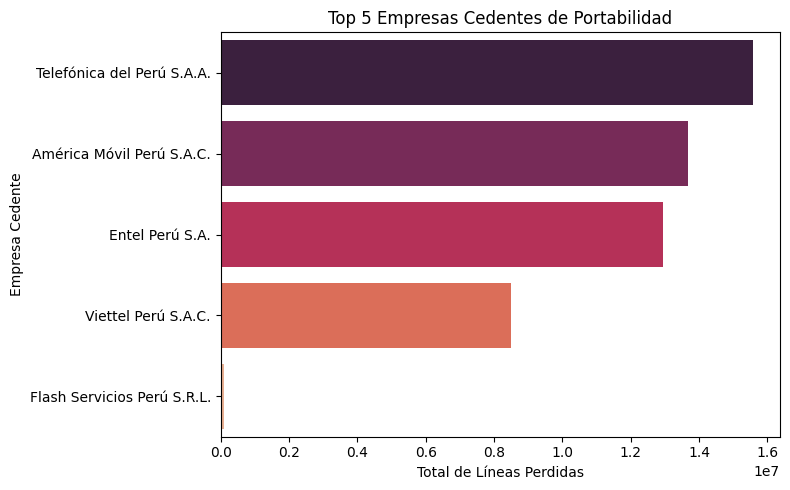

In [37]:
# Agrupar por cedente y sumar las líneas perdidas
top_cedentes = df.groupby("Cedente")["Líneas"].sum().sort_values(ascending=False).head(5)
print("Top 5 empresas cedentes (más líneas perdidas):")
print(top_cedentes)

# Gráfico de barras para cedentes
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cedentes.values, y=top_cedentes.index, palette="rocket")
plt.title("Top 5 Empresas Cedentes de Portabilidad")
plt.xlabel("Total de Líneas Perdidas")
plt.ylabel("Empresa Cedente")
plt.tight_layout()
plt.show()

Modalidad Receptor
POSTPAGO    29968840
PREPAGO     20865064
Name: Líneas, dtype: int64


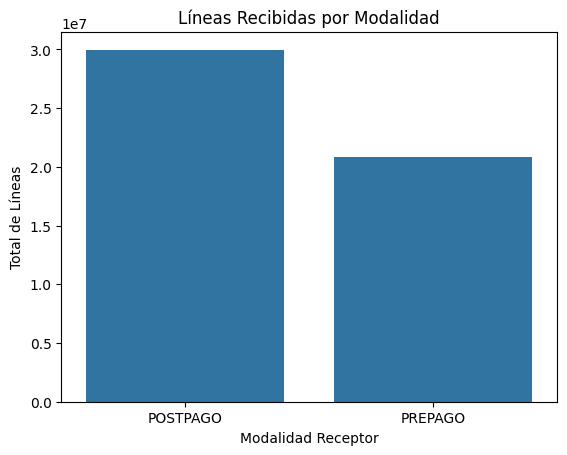

In [33]:
modalidad = df.groupby("Modalidad Receptor")["Líneas"].sum()
print(modalidad)

# Visualización por modalidad
sns.barplot(x=modalidad.index, y=modalidad.values)
plt.title("Líneas Recibidas por Modalidad")
plt.ylabel("Total de Líneas")
plt.xlabel("Modalidad Receptor")
plt.show()
